<a href="https://colab.research.google.com/github/ask4semoy/tests/blob/main/Classification_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Classification

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

In [5]:
# Load the Iris dataset
iris = load_iris()

# Convert the data into a DataFrame
iris_df = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names'] + ['target'])

iris_df.head()

print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [8]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [12]:
print(iris_df)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     target  
0       0.0  

In [9]:
print(iris['target'])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [11]:
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [18]:
iris = load_iris()

# Split the dataset into training and testing sets to verify the algorithym works
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_test)

(120, 4)
(30, 4)
(120,)
(30,)
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


In [ ]:
iris = load_iris()

# Split the dataset into training and testing sets to verify the algorithym works
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

#x_train will store 80% of the feature data (iris.data)
#x_test will store 20% of the feature data
#y_train will store 80% of target data
#y_test will store 20% of target data

# Create a K-Nearest Neighbors classifier (3 nearest neighbors)
knn = KNeighborsClassifier(n_neighbors=3)

# Train the classifier
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


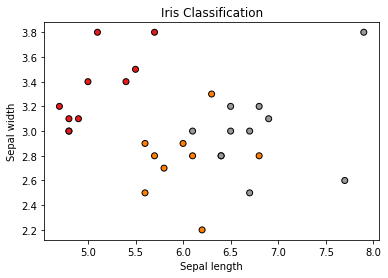

In [ ]:
#[:, 0] means column 0
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.Set1, edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Iris Classification')
plt.show()



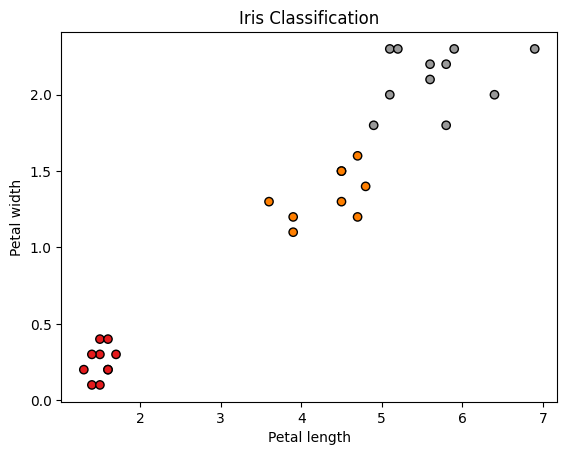

In [19]:
#PLOT THE GROUPED DATA WITH PETAL LENGTH AND PETAL WIDTH AND SAVE TO GITHUB
plt.scatter(X_test[:, 2], X_test[:, 3], c=y_test, cmap=plt.cm.Set1, edgecolor='k')
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.title('Iris Classification')
plt.show()

## Clustering

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering

# Generate the "blobs" dataset
X, y = make_blobs(n_samples=200, centers=4, random_state=42)

X

array([[  6.50565335,   2.4470026 ],
       [ -5.12894273,   9.83618863],
       [ -8.85057453,   6.42626854],
       [-10.2864121 ,   5.91605914],
       [ -7.46899195,  -6.0305075 ],
       [ -6.13233359,  -6.26973933],
       [  4.44751787,   2.27471703],
       [ -9.30936606,   7.55557285],
       [  4.375222  ,   4.69333885],
       [ -6.06676507,  -6.25048075],
       [ -7.80655766,  -6.93963495],
       [  4.86733877,   3.28031244],
       [  5.72293008,   3.02697174],
       [ -7.36499074,  -6.79823545],
       [ -8.90476978,  -6.69365528],
       [ -7.7086222 ,  -7.44029063],
       [ -2.58120774,  10.01781903],
       [ -9.66054815,   7.56721013],
       [ -6.193367  ,  -8.49282546],
       [ -5.29361038,  -8.11792509],
       [ -4.75747099,  -5.84764433],
       [ -7.3545725 ,  -7.53343883],
       [ -8.5156092 ,   6.49629197],
       [ -2.44166942,   7.58953794],
       [ -8.15637479,   7.01325616],
       [ -3.18611962,   9.62596242],
       [ -3.6601912 ,   9.38998415],
 

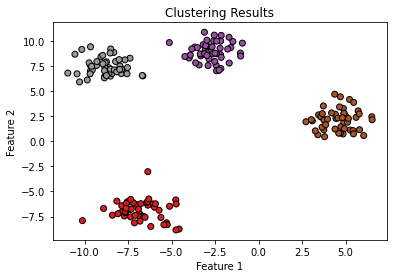

In [ ]:
# Create an Agglomerative Clustering model
clustering = AgglomerativeClustering(n_clusters=4)

# Fit the model to the data
clustering.fit(X)

# Get the cluster labels
labels = clustering.labels_

# Plotting the clustering results
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap=plt.cm.Set1, edgecolor='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Clustering Results')
plt.show()

In [ ]:
labels

array([2, 1, 3, 3, 0, 0, 2, 3, 2, 0, 0, 2, 2, 0, 0, 0, 1, 3, 0, 0, 0, 0,
       3, 1, 3, 1, 1, 0, 1, 2, 0, 0, 3, 3, 1, 2, 3, 2, 3, 1, 0, 1, 0, 0,
       3, 2, 2, 0, 2, 1, 3, 1, 3, 2, 1, 1, 0, 0, 1, 2, 3, 2, 0, 3, 3, 0,
       2, 1, 3, 1, 1, 3, 1, 0, 2, 0, 2, 1, 0, 1, 1, 2, 0, 3, 3, 3, 3, 1,
       2, 3, 0, 1, 2, 2, 2, 3, 1, 2, 0, 1, 3, 3, 1, 0, 1, 2, 3, 0, 0, 3,
       2, 0, 1, 3, 1, 3, 3, 1, 1, 1, 3, 0, 2, 3, 3, 2, 1, 2, 2, 1, 0, 0,
       1, 3, 3, 2, 0, 0, 1, 0, 2, 1, 3, 2, 2, 1, 2, 3, 0, 0, 1, 3, 2, 3,
       0, 3, 3, 2, 2, 2, 1, 2, 2, 3, 1, 0, 2, 2, 0, 2, 3, 1, 0, 0, 2, 0,
       2, 1, 1, 0, 1, 0, 3, 3, 3, 1, 2, 2, 2, 1, 1, 0, 3, 3, 1, 3, 2, 1,
       0, 2])